In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! conda update -n base -c conda-forge conda -y

In [82]:
TP_pickle = '../TP/final_tp.pkl'
TN_pickle = '../TN/final_tn.pkl'
tp = pd.read_pickle(TP_pickle)
tn = pd.read_pickle(TN_pickle)
tp['LABEL'] = 1
tn['LABEL'] = 0


In [3]:
tn = tn.sample(n=tp.shape[0], random_state=1)


(10387, 3) (10387, 3)


In [83]:

tp = tp[['LABEL', 'FinalScore', 'maxsplai']]
tn = tn[['LABEL', 'FinalScore', 'maxsplai']]
print(tp.shape, tn.shape)

(10387, 3) (47347, 3)


optimal threshold:  3.0


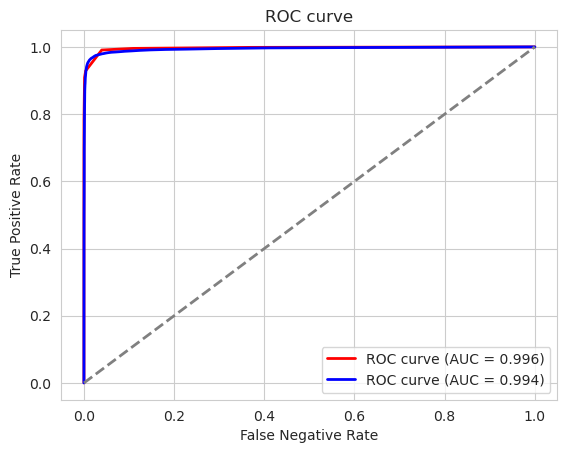

In [84]:
# combine tp and tn
data = pd.concat([tp, tn], ignore_index=True)

# ROC curve (LABEL, FinalScore)
fpr1, tpr1, thresholds1 = roc_curve(data['LABEL'], data['FinalScore'])
auc1 = roc_auc_score(data['LABEL'], data['FinalScore'])

fpr2, tpr2, thresholds2 = roc_curve(data['LABEL'], data['maxsplai'])
auc2 = roc_auc_score(data['LABEL'], data['maxsplai'])

# Calculate optimal threshold from ROC curve by Youden's J statistic
Youden_index = np.argmax(tpr1 - fpr1)
optimal_threshold = thresholds1[Youden_index]
print('optimal threshold: ', optimal_threshold)

# plot ROC curve
sns.set_style("whitegrid")

plt.figure()
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve (AUC = %0.3f)' % auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve (AUC = %0.3f)' % auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.show()

In [87]:
def pred_fw(df: pd.DataFrame, cutoff: int) -> pd.DataFrame:
    df[f"FW_PRED_{cutoff}"] = df['FinalScore'].apply(lambda x: 1 if x >= cutoff else 0)
    return df

def pred_maxsplai(df: pd.DataFrame, cutoff: float) -> pd.DataFrame:
    df[f"SpliceAI_PRED_{cutoff}"] = df['maxsplai'].apply(lambda x: 1 if x >= cutoff else 0)
    return df

# confusion matrix

for i in range(0, 11):
    data = pred_fw(data, i)

for i in range(0, 10):
    data = pred_maxsplai(data, i/10)

FW: tn=0, fp=47347, fn=0, tp=10387
SA: tn=47142, fp=205, fn=755, tp=9632



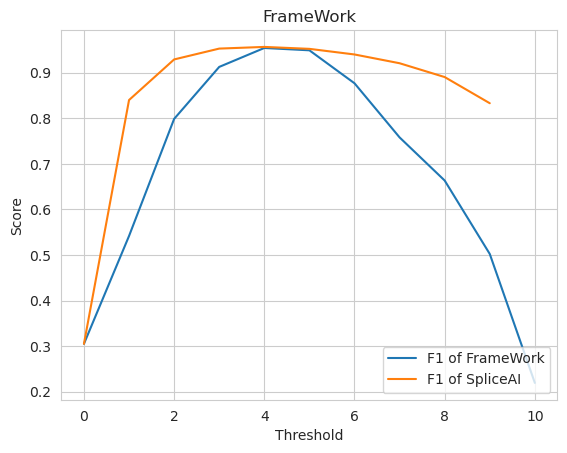

In [92]:
fw_threshold = 0
sa_threshold = 0.5

cm = confusion_matrix(data['LABEL'], data[f'FW_PRED_{fw_threshold}'])
cm2 = confusion_matrix(data['LABEL'], data[f'SpliceAI_PRED_{sa_threshold}'])

tn, fp, fn, tp = cm.flatten()
tn2, fp2, fn2, tp2 = cm2.flatten()

print(f"FW: tn={tn}, fp={fp}, fn={fn}, tp={tp}")
print(f"SA: tn={tn2}, fp={fp2}, fn={fn2}, tp={tp2}")
print("")

# fw_score: list = [accuracy_score(data['LABEL'], data[f'FW_PRED_{fw_threshold}']), precision_score(data['LABEL'], data[f'FW_PRED_{fw_threshold}']), recall_score(data['LABEL'], data[f'FW_PRED_{fw_threshold}']), f1_score(data['LABEL'], data[f'FW_PRED_{fw_threshold}'])]
# sa_score: list = [accuracy_score(data['LABEL'], data[f'SpliceAI_PRED_{sa_threshold}']), precision_score(data['LABEL'], data[f'SpliceAI_PRED_{sa_threshold}']), recall_score(data['LABEL'], data[f'SpliceAI_PRED_{sa_threshold}']), f1_score(data['LABEL'], data[f'SpliceAI_PRED_{sa_threshold}'])]

# summary = pd.DataFrame([fw_score, sa_score], columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=['FrameWork', 'SpliceAI'])
# print(summary)

fw_accuracy: list = [accuracy_score(data['LABEL'], data[f'FW_PRED_{i}']) for i in range(0, 11)]
fw_precision: list = [precision_score(data['LABEL'], data[f'FW_PRED_{i}']) for i in range(0, 11)]
fw_recall: list = [recall_score(data['LABEL'], data[f'FW_PRED_{i}']) for i in range(0, 11)]
fw_f1: list = [f1_score(data['LABEL'], data[f'FW_PRED_{i}']) for i in range(0, 11)]

sa_accuracy: list = [accuracy_score(data['LABEL'], data[f'SpliceAI_PRED_{i/10}']) for i in range(0, 10)]
sa_precision: list = [precision_score(data['LABEL'], data[f'SpliceAI_PRED_{i/10}']) for i in range(0, 10)]
sa_recall: list = [recall_score(data['LABEL'], data[f'SpliceAI_PRED_{i/10}']) for i in range(0, 10)]
sa_f1: list = [f1_score(data['LABEL'], data[f'SpliceAI_PRED_{i/10}']) for i in range(0, 10)]


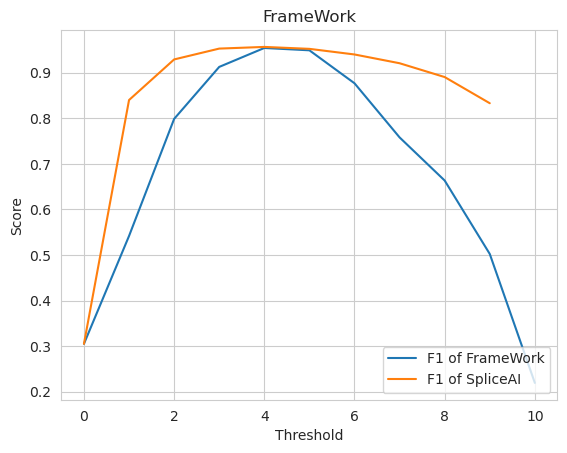

In [104]:

plt.figure()
# plt.plot(fw_accuracy, label='Accuracy of FrameWork')
# plt.plot(fw_precision, label='Precision of FrameWork')
# plt.plot(fw_recall, label='Recall of FrameWork')
plt.plot(fw_f1, label='F1 of FrameWork')

# plt.plot(sa_accuracy, label='Accuracy of SpliceAI')
# plt.plot(sa_precision, label='Precision of SpliceAI')
# plt.plot(sa_recall, label='Recall of SpliceAI')
plt.plot(sa_f1, label='F1 of SpliceAI')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('FrameWork')
plt.legend(loc="lower right")
plt.show()



In [9]:
tp['FinalScore'].value_counts()

FinalScore
9     2205
6     1774
8     1673
5     1329
10    1278
7     1185
3      641
4      206
2       50
1       32
0       14
Name: count, dtype: int64

In [25]:
print(auc)

0.9964874225845729


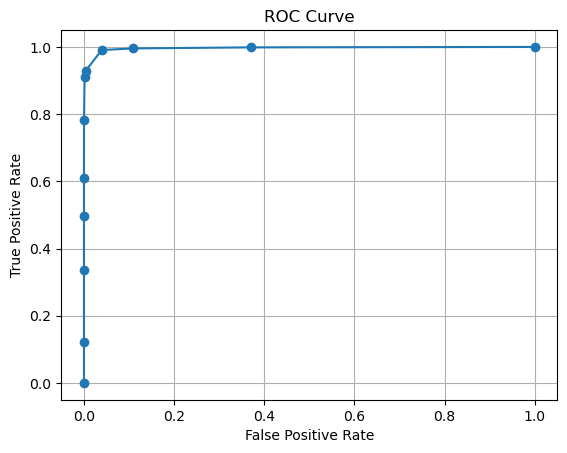

In [20]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()

0.9943155009177037


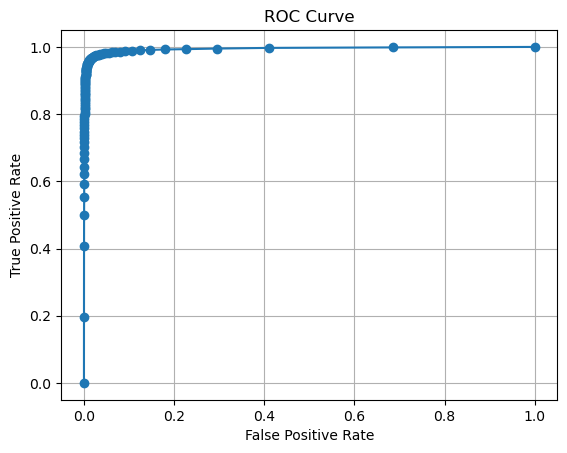

In [26]:
# ROC (LABEL, maxsplai)
fpr, tpr, thresholds = roc_curve(data['LABEL'], data['maxsplai'])
auc = roc_auc_score(data['LABEL'], data['maxsplai'])
print(auc)
plt.plot(fpr, tpr, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()

array([ inf, 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])